In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('D:\Python\Wine_quality_prediction\winequality-red.csv')

In [4]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
data['quality']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

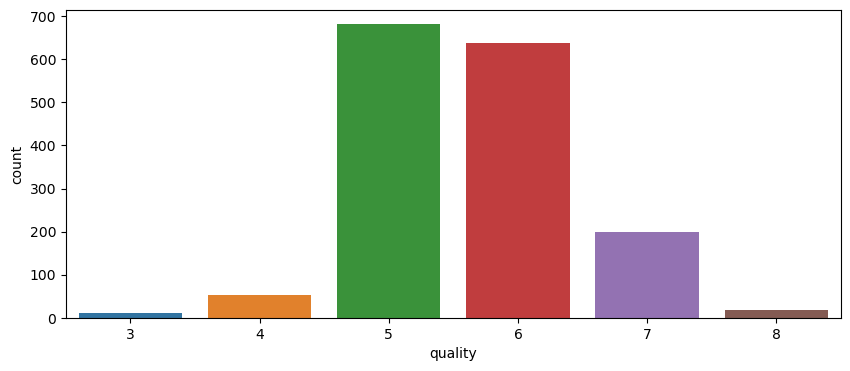

In [13]:
plt.figure(figsize = (10,4))
sns.countplot(data=data,x='quality')
plt.show()

<Axes: >

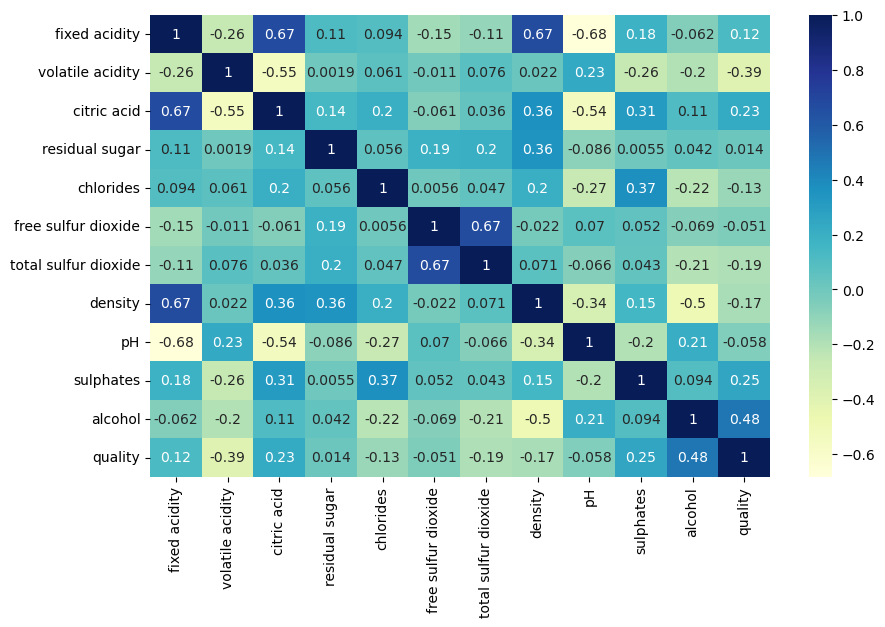

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")

<Axes: xlabel='quality', ylabel='alcohol'>

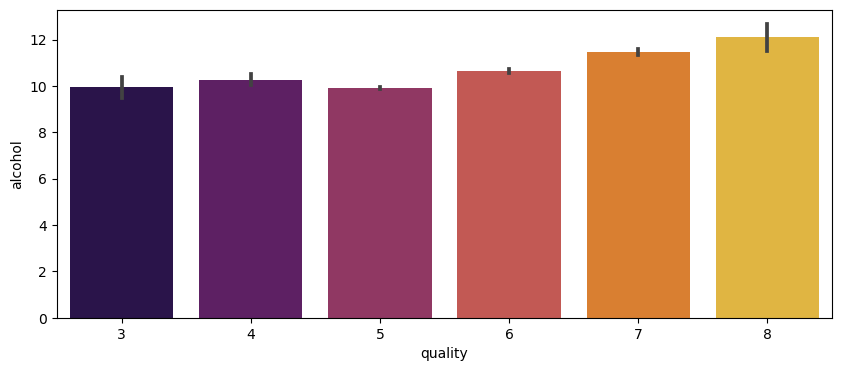

In [15]:
plt.figure(figsize = (10,4))
sns.barplot(x='quality', y = 'alcohol', data = data, palette = 'inferno')

In [16]:
x=data.drop(['quality'], axis=1)
y=data['quality']

In [20]:
from sklearn.model_selection import train_test_split as tts

In [36]:
X_train,X_test,y_train,y_test=tts(x,y,test_size=0.2)

## Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [38]:
reg.score(X_test,y_test)

0.36248038186549913

In [39]:
from sklearn.preprocessing import StandardScaler

stdscale = StandardScaler().fit(X_train)
X_train_std = stdscale.transform(X_train)
X_test_std = stdscale.transform(X_test)

In [40]:
reg.fit(X_train_std,y_train)

LinearRegression()

In [41]:
reg.score(X_test_std,y_test)

0.36248038186550113

## Random Forest Classifier (Extra)

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_std, y_train)

RandomForestClassifier(random_state=42)

In [49]:
rf.score(X_test_std,y_test)

0.725

In [51]:
predictions = rf.predict(X_test)
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

C:\Users\Sruti Dey\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.415625